In [35]:
%pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


# Loading Dataset

In [36]:
def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df

apps_data = load_dataset()
apps_data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9400,RUN JUMP RUN-fun games for free,GAME,4.4,661,42M,"100,000+",Free,0,Everyone,Action,"April 20, 2018",1.5.2,3.0 and up
3046,Fantasy Football,SPORTS,3.5,50179,23M,"1,000,000+",Free,0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
6507,BN Pro ArialXL Legacy Text,LIBRARIES_AND_DEMO,4.1,142,442k,"10,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
5296,Wallpapers AK 74M,PERSONALIZATION,NaN,0,11M,10+,Free,0,Teen,Personalization,"April 13, 2018",1.0,4.1 and up
8329,DF BugMeNot,SOCIAL,NaN,7,1.4M,500+,Free,0,Teen,Social,"October 29, 2015",1.0,5.0 and up
262,ClickMeeting Webinars,BUSINESS,3.8,5211,26M,"1,000,000+",Free,0,Everyone,Business,"July 30, 2018",3.3.0,4.0 and up
5705,"HD Video Player (wmv,avi,mp4,flv,av,mpg,mkv)2017",VIDEO_PLAYERS,3.3,171,4.8M,"10,000+",Free,0,Everyone,Video Players & Editors,"August 10, 2017",1.1,4.1 and up
8306,Love Fonts for FlipFont,PERSONALIZATION,3.9,28694,2.9M,"1,000,000+",Free,0,Everyone,Personalization,"January 14, 2018",1.4.6,4.0.3 and up
10268,Middlesbrough FC Official,SPORTS,4.5,152,36M,"10,000+",Free,0,Everyone,Sports,"May 29, 2018",2018.5.25,4.4 and up
1872,Subway Surfers,GAME,4.5,27725352,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


# Printing summarize dataset

In [37]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("10 random rows from the data set:")
    print(dataset.sample(10))
    print("Statistical summary:")
    print(dataset.describe())
    print("Additional informations:")
    print(dataset.info())

print_summarize_dataset(apps_data)

Dataset dimension:
(10841, 13)
First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0  

# Cleaning dataset

In [38]:
apps_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [39]:
def clean_dataset(dataset):
  # We fill the NaN values in the ranking column with the previous values.
  dataset['Rating'].fillna(method='ffill', inplace=True)
  # We discard NaN values in the Content Rating column.
  dataset.dropna(subset=['Content Rating'], inplace=True)
  # The type column only has 1 NaN value. We fill it with the most popular "Free" values.
  dataset['Type'].fillna(value = 'Free', inplace = True)
  # We discard the unnecessary columns
  dataset.drop(columns=['Last Updated', 'Current Ver', 'Android Ver'], inplace=True)
  # Correct the data type of numeric columns
  dataset['Reviews'] = dataset['Reviews'].astype(int)

  dataset['Size'] = dataset['Size'].map(lambda x: x.strip('+').replace(',', ''))
  dataset['Size'] = dataset['Size'].str.replace('M', 'e+6')
  dataset['Size'] = dataset['Size'].str.replace('k', 'e+3')
  dataset['Size'] = dataset['Size'].replace('Varies with device', np.NaN)
  dataset.dropna(subset = ['Size'], inplace=True)

  dataset['Installs'] = dataset['Installs'].map(lambda x: x.strip('+').replace(',', ''))
  dataset['Price'] = dataset['Price'].str.replace('$', '')
  dataset[['Size', 'Installs', 'Price']] = dataset[['Size', 'Installs', 'Price']].apply(pd.to_numeric, axis = 1)

  return dataset

clean_dataset(apps_data)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.0,0,9600000.0,10.0,Free,0.0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,5.0,3,9500000.0,1000.0,Free,0.0,Everyone,Medical


# Visualization

### First glance

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


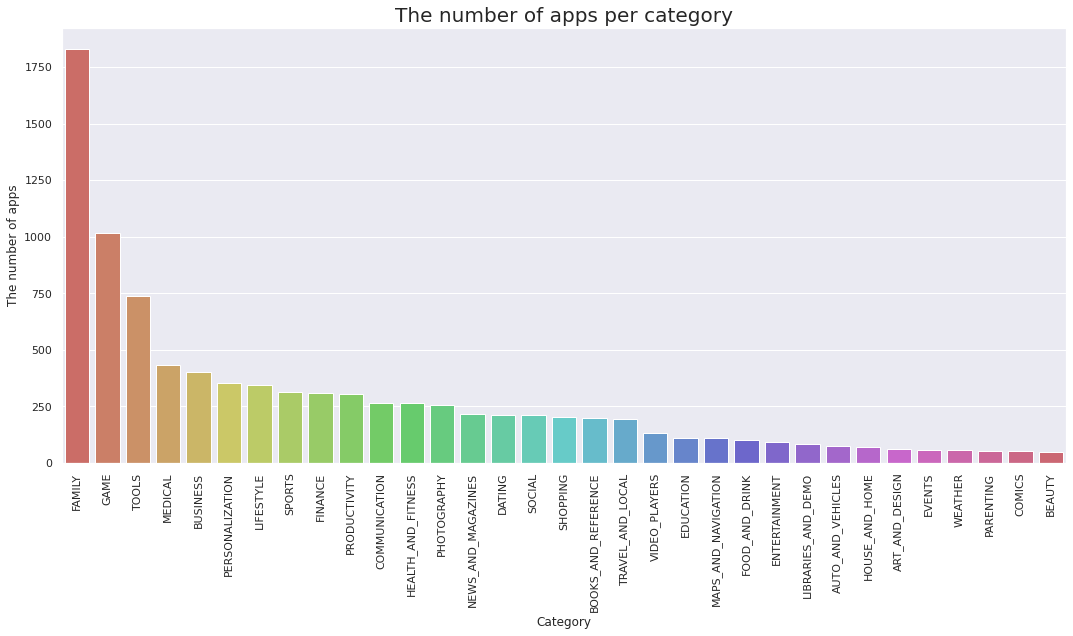

In [40]:
def NumApps_Category(dataset):
  # How many apps are in each category
  sns.set()
  sns.set_style('darkgrid')
  plt.figure(figsize = (18, 8))
  x = dataset['Category'].value_counts().index.tolist()
  y = dataset['Category'].value_counts().values.tolist()
  plt.title('The number of apps per category', fontsize = 20)
  plt.ylabel('The number of apps')
  plt.xlabel('Category')
  plt.xticks(rotation=90)
  sns.barplot(x, y, palette = 'hls', data=apps_data)
  plt.show()

NumApps_Category(apps_data)

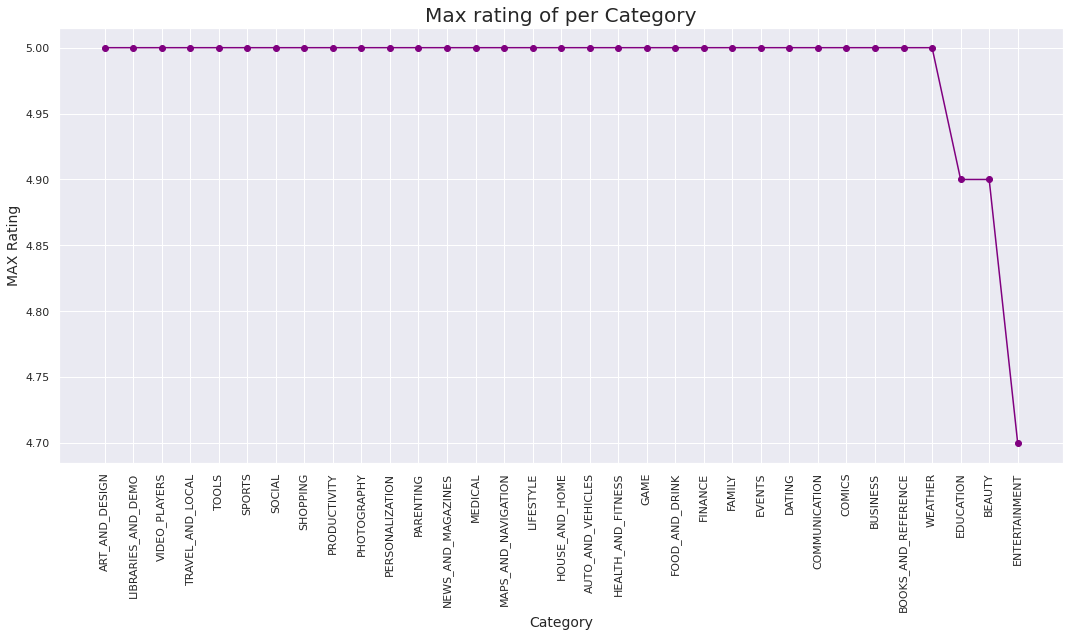

In [41]:
def max_rating(dataset):
  # Maximum rating for each category
  df = dataset.groupby('Category', as_index=False)[['Rating']].max()
  df.sort_values(by='Rating', ascending=False, inplace=True)
  Category = df.Category.values.tolist()
  Rating = df.Rating.values.tolist()
  plt.figure(figsize = (18, 8))
  plt.plot(Category, Rating, color='purple', marker='o')
  plt.title('Max rating of per Category', fontsize=20)
  plt.xlabel('Category', fontsize=14)
  plt.ylabel('MAX Rating', fontsize=14)
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

max_rating(apps_data)

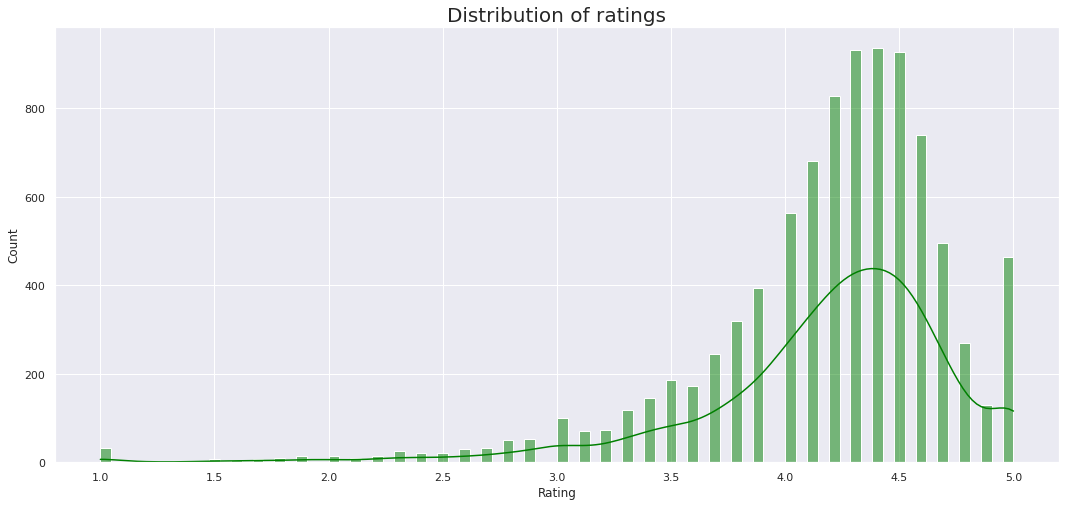

In [42]:
def many_repeated_ratings(dataset):
  # most repeated ratings
  plt.figure(figsize = (18, 8))
  plt.title('Distribution of ratings', fontsize=20)
  sns.histplot(data=dataset, x="Rating", kde=True, color= "green")
  plt.show()

many_repeated_ratings(apps_data)

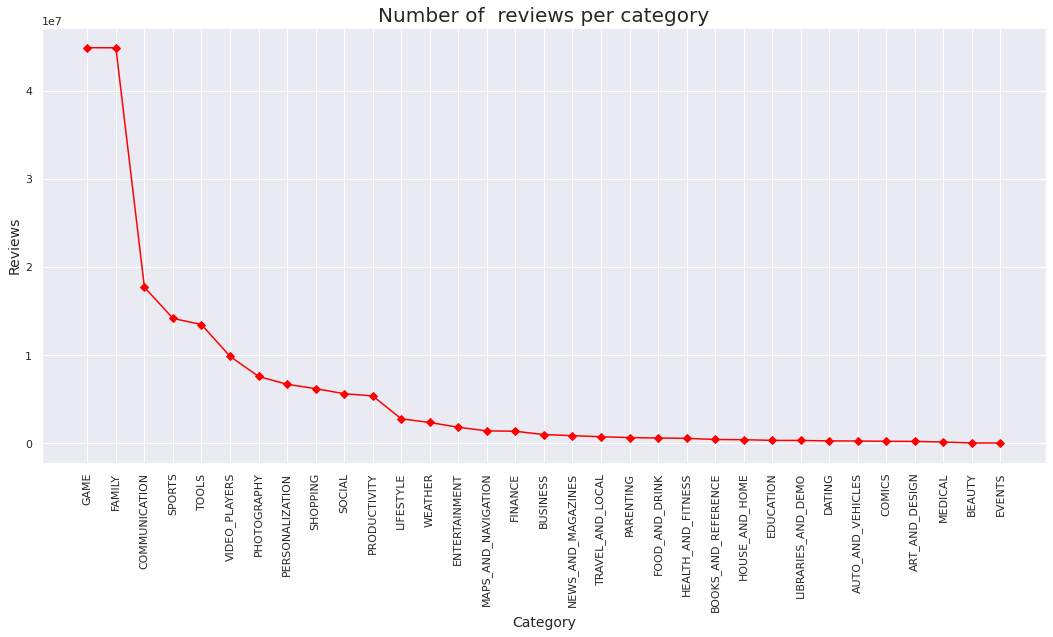

In [43]:
def reviews_category(dataset):
  # Max rating of per Category
  df = dataset.groupby('Category', as_index=False)[['Reviews']].max()
  df.sort_values(by='Reviews', ascending=False, inplace=True)
  Category = df.Category.values.tolist()
  Reviews = df.Reviews.values.tolist()
  plt.figure(figsize = (18, 8))
  plt.plot(Category, Reviews, color='red', marker='D')
  plt.title('Number of  reviews per category', fontsize=20)
  plt.xlabel('Category', fontsize=14)
  plt.ylabel('Reviews', fontsize=14)
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

reviews_category(apps_data)

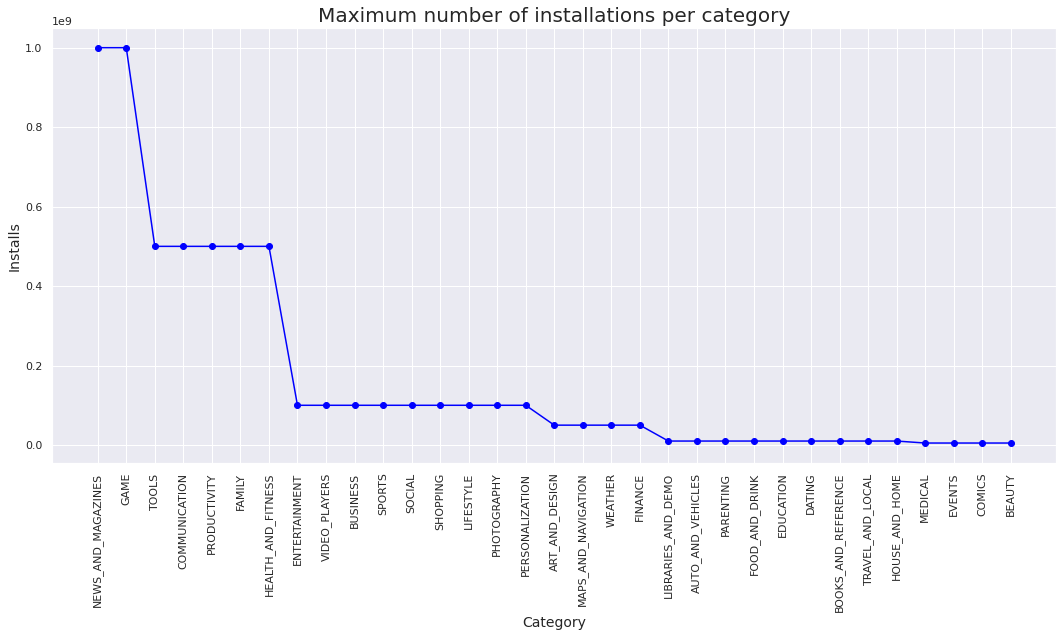

In [44]:
def Max_Inst_PerCat(dataset):
  # Max rating of per Category
  df = dataset.groupby('Category', as_index=False)[['Installs']].max()
  df.sort_values(by='Installs', ascending=False, inplace=True)
  Category = df.Category.values.tolist()
  Installs = df.Installs.values.tolist()
  plt.figure(figsize = (18, 8))
  plt.plot(Category, Installs, color='blue', marker='o')
  plt.title('Maximum number of installations per category', fontsize=20)
  plt.xlabel('Category', fontsize=14)
  plt.ylabel('Installs', fontsize=14)
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

Max_Inst_PerCat(apps_data)

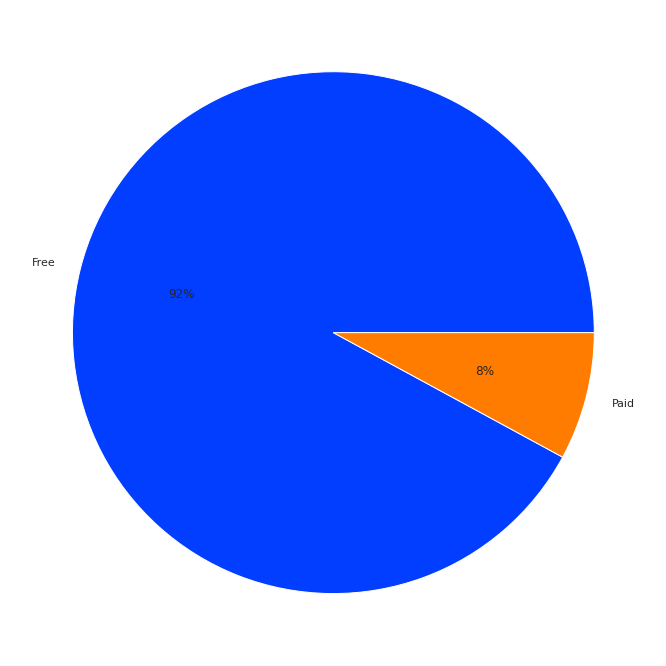

In [45]:
def paid_free(dataset):
  # Percentage share of paid and free apps
  ser = dataset['Type'].value_counts()
  keys = ["Free", "Paid"]
  palette_color = sns.color_palette('bright')
  plt.figure(figsize = (16, 12))
  plt.pie(ser, labels = keys, colors=palette_color, autopct='%.0f%%')
  plt.show()

paid_free(apps_data)

### Basic analyses

In [46]:
def bar_diagram(dataset):
  # Plot with bar diagram the most populars paid apps of Family category

  Fam_Cat_Paid = dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid'), ['App', 'Rating']]
  MostPopFam_Cat_Paid = Fam_Cat_Paid.nlargest(10, "Rating")
  App = MostPopFam_Cat_Paid['App']
  Rating = MostPopFam_Cat_Paid['Rating']
  
  # Figure Size
  fig, ax = plt.subplots(figsize =(18, 8))
  # Horizontal Bar Plot
  ax.barh(App, Rating)
  # Add x, y gridlines
  ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.9, alpha = 0.7)
  # Show top values
  ax.invert_yaxis()
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='red')
  # Add Plot Title
  ax.set_title('The MOST 10 POPULAR paid apps of Family category', fontsize = 22, loc ='center')
  plt.show()

# bar_diagram(apps_data)

In [47]:
def pie_diagram(dataset):
  # Plot with a pie diagram the most popular genres according to the number of installations from paid family

  Genr_Ins = dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid'), ['Genres', 'Installs']]
  MostPop_Genr_Ins = dict(Genr_Ins.nlargest(10, 'Installs').values)
  Genres = list(MostPop_Genr_Ins.keys())
  Installs = list(MostPop_Genr_Ins.values())

  fig = plt.figure(figsize = (16, 12))
  # declaring exploding pie
  explode = (0.2, 0, 0.2, 0, 0.2, 0, 0, 0)
  # define Seaborn color palette to use
  palette_color = sns.color_palette("husl", 9)
  # Add Plot Title
  plt.title('The most popular genres according to the number of installations from paid family', fontsize = 20)
  # plotting data on chart
  plt.pie(Installs, labels=Genres, colors=palette_color, explode=explode, autopct='%.0f%%')
  plt.show()

# pie_diagram(apps_data)

In [48]:
def arr_of_install(dataset):
  # An array with the number of installation per category
  InstNum_PerCategory = dataset.groupby('Category', as_index=False)[['Installs']].sum()
  InstNum_PerCategory.sort_values(by='Installs', ascending=False, inplace=True)
  Category = InstNum_PerCategory.Category.values.tolist()
  Installs = InstNum_PerCategory.Installs.values.tolist()
  plt.figure(figsize=(18, 8))
  plt.xlabel("Category")
  plt.ylabel("Installs")
  plt.xticks(rotation=90)
  plt.title('The Installation per category', fontsize = 20)
  plt.plot(Category, Installs, marker=11, linestyle='solid')
  plt.show()

# arr_of_install(apps_data)

In [49]:
def Ins_Per_Category(dataset):
   # PLot with bar chart the number of installation per category

  df = dataset.groupby('Category', as_index=False)[['Installs']].sum()
  df.sort_values(by='Installs', ascending=False, inplace=True)
  Category = df.Category.values.tolist()
  Installs = df.Installs.values.tolist()

  plt.figure(figsize=(18, 8))
  plt.xlabel("Category")
  plt.ylabel("Installs")
  plt.xticks(rotation = 90)
  bar = sns.barplot(x = Category, y = Installs, alpha =0.9, palette= "Accent")
  bar.set_title("The number of installation per category", fontsize = 20)
  plt.show()

# Ins_Per_Category(apps_data)

In [50]:
def mean_price_per_categ(dataset):
   # Plot a bar with the mean price per category

  mean_price_per_category = dataset.groupby('Category', as_index=False)[['Price']].mean()
  mean_price_per_category.sort_values('Price', ascending=False, inplace=True)
  Category = mean_price_per_category.Category.values.tolist()
  Price = mean_price_per_category.Price.values.tolist()

  plt.figure(figsize=(18, 8))
  plt.xlabel("Price")
  plt.ylabel("Category")
  graph = sns.barplot(x = Price, y = Category, alpha =0.9, palette= "Spectral")
  graph.set_title("The mean price per category", fontsize = 20) 

# mean_price_per_categ(apps_data)

In [51]:
def MostExp_Apps_PerCat(dataset):
    # Most expensive apps per category

    MostExp_Apps_PerCat = dataset.groupby('Category', as_index=False)[['App','Price']].max()
    MostExp_Apps_PerCat.sort_values('Price', inplace=True)
    # Category = MostExp_Apps_PerCat.Category.values.tolist()
    Price = MostExp_Apps_PerCat.Price.values.tolist()
    Category = MostExp_Apps_PerCat['Category & Apps'] = MostExp_Apps_PerCat['Category'].astype(str) +" - "+ MostExp_Apps_PerCat["App"]
    Category = MostExp_Apps_PerCat['Category & Apps'].values.tolist()

    plt.figure(figsize=(18, 12))
    plt.xlabel("Price")
    plt.ylabel("Category & App")
    graph = sns.barplot(x = Price, y = Category, alpha =0.9, palette= "Spectral")
    graph.set_title('The Most expensive apps per category', fontsize = 20)
    plt.show()
    
# MostExp_Apps_PerCat(apps_data)

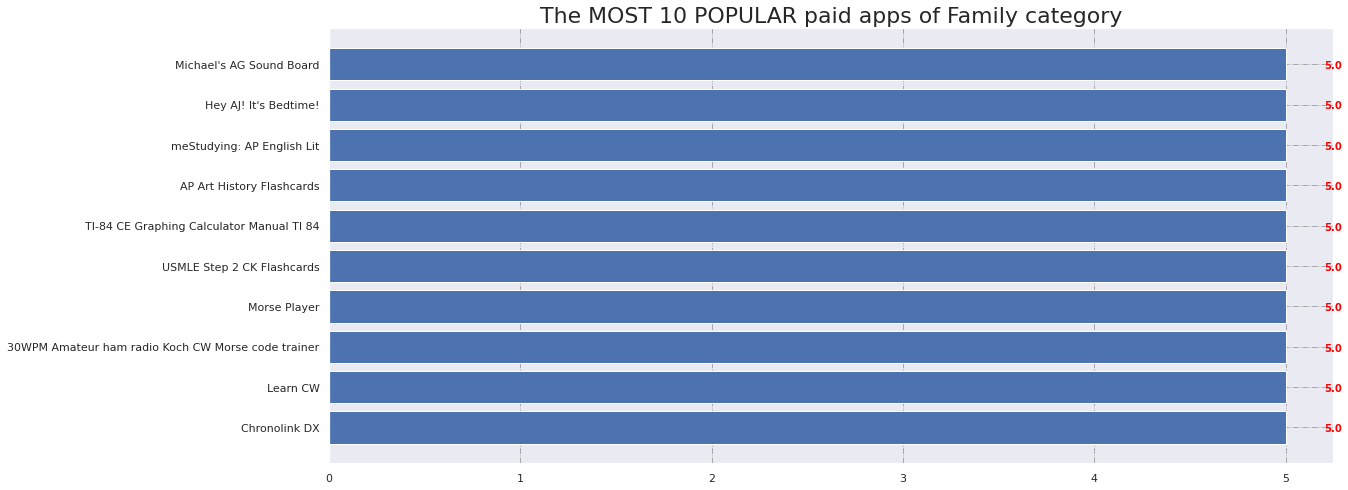

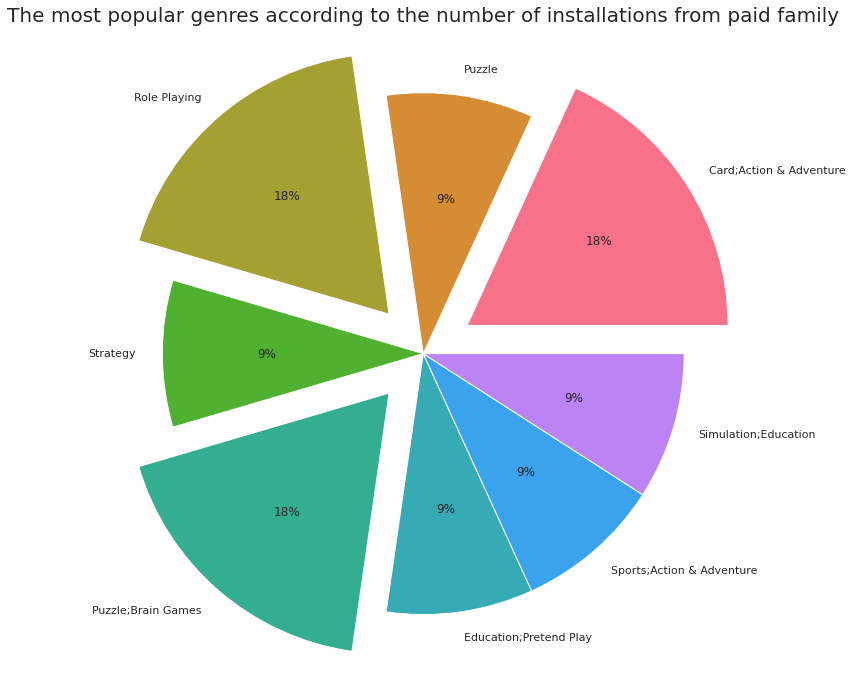

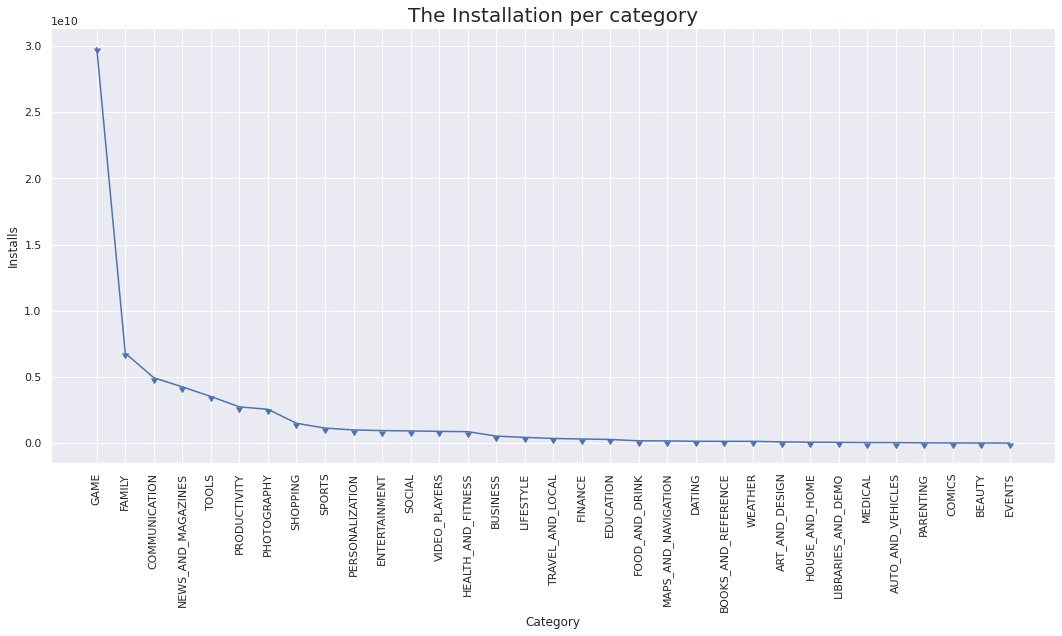

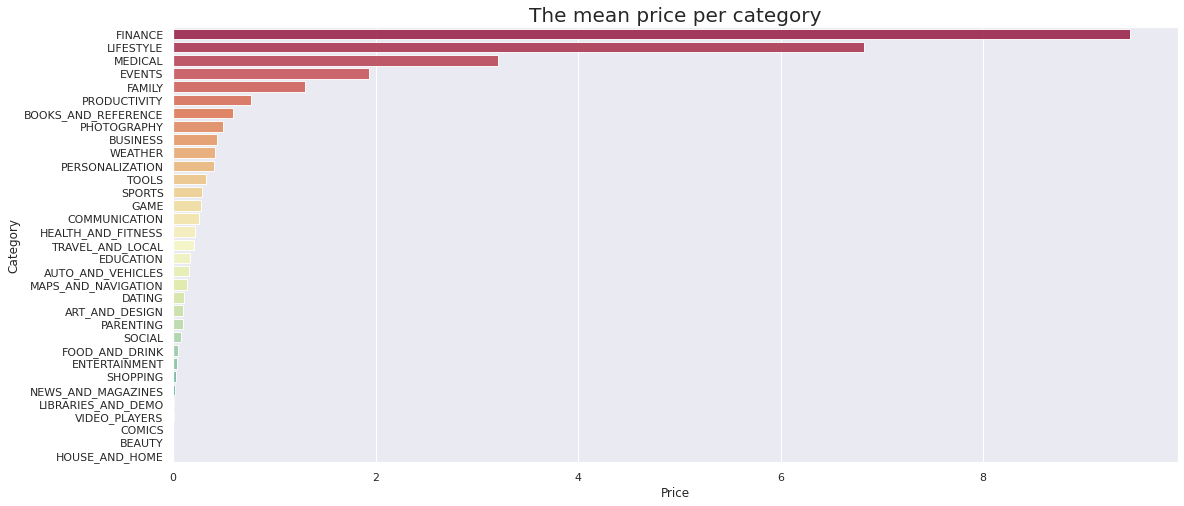

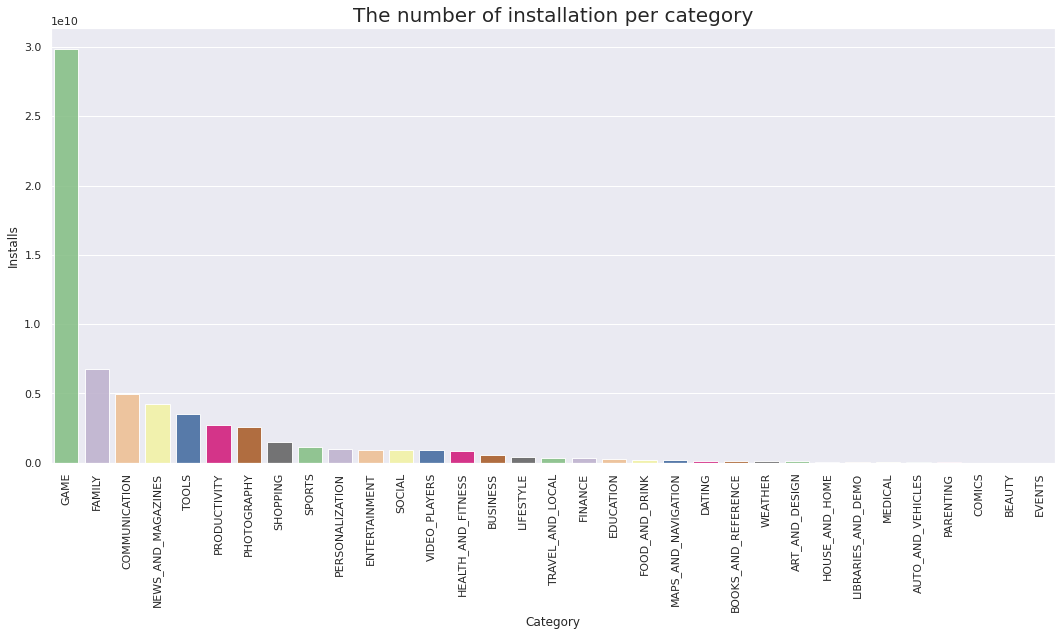

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/docode/.pyenv/versi

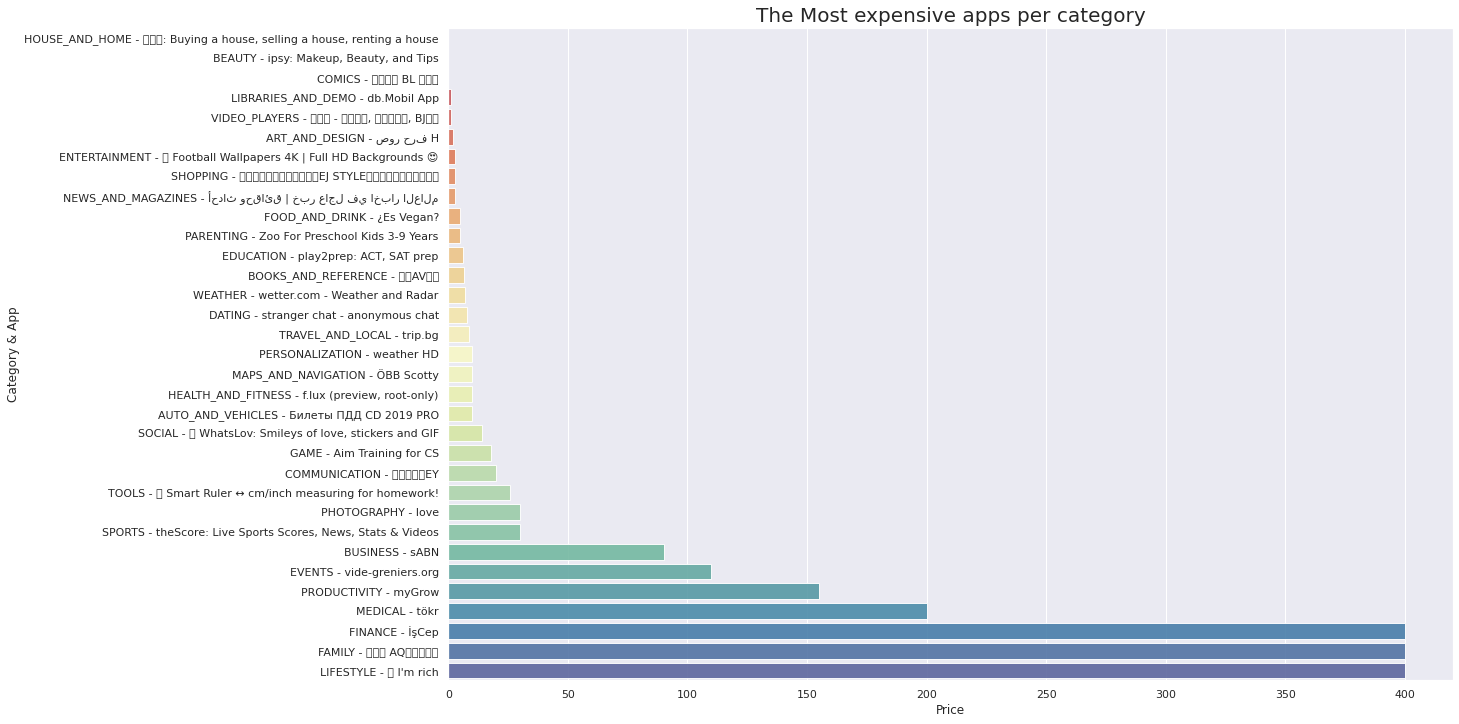

In [52]:
def print_histograms(dataset):
  # Plot with bar diagram the most populars paid apps of Family category
  bar_diagram(dataset)
  # Plot with a pie diagram the most popular genres according to the number of installations from paid family
  pie_diagram(dataset)
  # An array with the number of installation per category
  arr_of_install(dataset)
  # PLot with bar chart the number of installation per category
  mean_price_per_categ(apps_data)
  # Plot a bar with the mean price per category
  Ins_Per_Category(apps_data)
  # Most expensive apps per category
  MostExp_Apps_PerCat(apps_data)

print_histograms(apps_data)

## Correlations Matrix

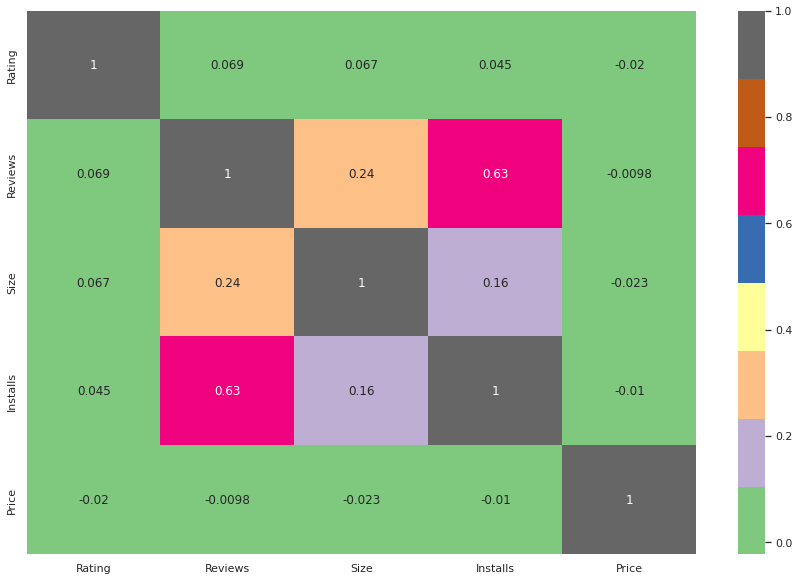

In [53]:
def compute_correlations_matrix(dataset):
  # Plot correlation of our dataset
  corrMatrix = dataset.corr()
  plt.figure(figsize=(15,10))
  sns.heatmap(corrMatrix, annot=True, cmap='Accent')
  plt.show()

compute_correlations_matrix(apps_data)

# Scatter Matrix


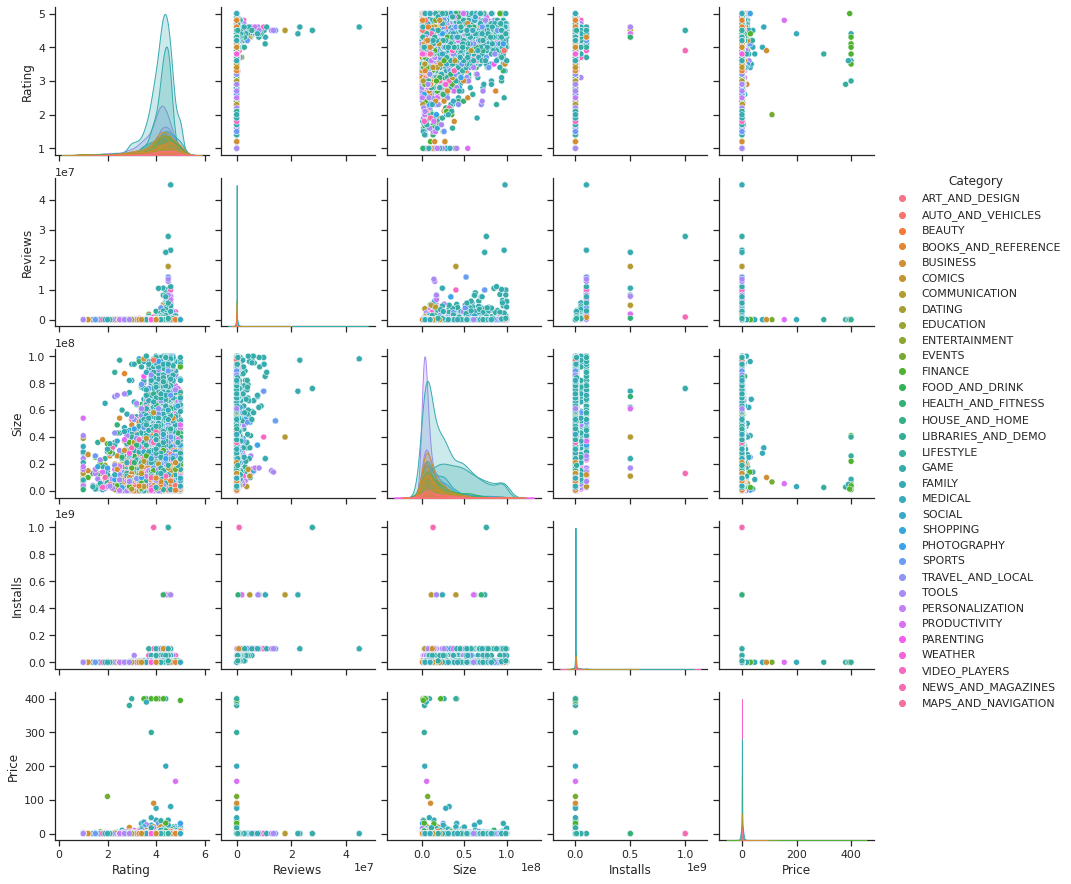

In [54]:
def print_scatter_matrix(dataset):
  sns.set()
  sns.set_theme(style="ticks")
  sns.pairplot(dataset, hue="Category")
  plt.show()

print_scatter_matrix(apps_data)